> ## **Project 7:Product Rating  Prediction**
**By: Yashshree Baviskar**

**Batch: Internship Batch 25**

## Problem Statement:-

#### After collecting the data, you need to build a machine learning model. Before model building do all data preprocessing steps involving NLP. Try different models with different hyper parameters and select the best model.

#### Follow the complete life cycle of data science. Include all the steps like,

**1. Data Cleaning**

**2. Exploratory Data Analysis**

**3. Data Preprocessing**

**4. Model Building**

**5. Model Evaluation**

**6. Selecting the best model**


##### We have a client who has a website where people write different reviews for technical products. Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the past and they don’t have a rating.

>So, we have to build an model which can predict the rating by seeing the review

In [1]:
# Importing necessary libraries
import pandas as pd # for data wrangling
import numpy as np # Basic computation Liabrary
import seaborn as sns # for Visualization
import matplotlib.pyplot as plt # Ploting package
%matplotlib inline

In [1]:
### Importing NLP libraries:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)

## importing warnings:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"Product_Ratings_DataSheet.csv")
df.sample(10)

,Unnamed: 0,Ratings,Review_Text,Summary
2337,2337,5,Perfect in this price range. Go for it,Brilliant
33232,33232,2.0 out of 5 stars,Over heat is produced while charging and while...,\r\n Over heat is produced while charging and...
21406,21406,5,Very nice and good shopping with flipkart,Excellent
8819,8819,5,Night mode,Just wow!
9230,9230,5,Supar phone,Awesome
49580,49580,3.0 out of 5 stars,Speaker sound very lowest,\r\n Mobile price ke hisaab se bohut acha he ...
454,454,5,Delivery was done after 8 days after purchasin...,Highly recommended
4107,4107,5,It was a nice laptop u should prefer it\nYou s...,Perfect product!
56013,56013,4.0 out of 5 stars,Snapshot feature missing. No guesture for snap...,\r\n It got deliver on 14th April. After usin...
33883,33883,2.0 out of 5 stars,"Camera sucks, A lot of software doesn't work o...",\r\n I regret buying this phone. There is Net...


In [4]:
## Checking the shape of our dataset:
df.shape

(56242, 4)

### Here We have 56242 records and 4 features including target variable.

In [5]:
df.drop(columns = 'Unnamed: 0', inplace = True)
print("We have {} Rows and {} Columns in our dataframe".format(df.shape[0], df.shape[1]))
df.head(20)

We have 56242 Rows and 3 Columns in our dataframe


,Ratings,Review_Text,Summary
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!
1,5,This laptop is soo good and I bought it after ...,Brilliant
2,5,Amazing laptop just great i bought this produc...,Brilliant
3,5,Brought this laptop after fair bit of research...,Terrific
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase
5,5,Great laptop with all the features exclusive!\...,Just wow!
6,5,The best performance.\n\nI searched a lot befo...,Excellent
7,5,Value for money in this price segment...laptop...,Just wow!
8,5,I am reviewing this laptop after 16 days of us...,Terrific
9,5,Awesome laptop\nGood perfomance\nBattery life ...,Brilliant


## Data Intigrity Check

In [6]:
df.isna().sum() # checking for missing values

Ratings          0
Review_Text      2
Summary        116
dtype: int64

**Using the 'isna' and 'sum' options together we can confirm that there some missing values in all the 3 columns of our dataset that will need to be treated.**

In [7]:
import missingno

<AxesSubplot:>

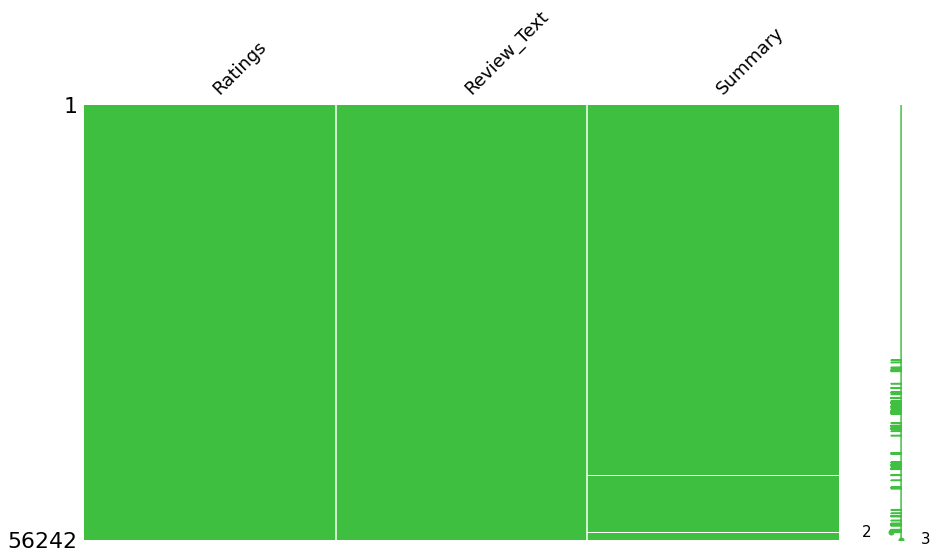

In [8]:
missingno.matrix(df, figsize = (15,8), color=(0.25, 0.75, 0.25), fontsize=18)

In [9]:
print("We have {} Rows and {} Columns in our dataframe before removing NaN".format(df.shape[0], df.shape[1]))
df.dropna(inplace=True)
print("We have {} Rows and {} Columns in our dataframe after removing NaN".format(df.shape[0], df.shape[1]))

We have 56242 Rows and 3 Columns in our dataframe before removing NaN
We have 56124 Rows and 3 Columns in our dataframe after removing NaN


In [10]:
df.isnull().sum()

Ratings        0
Review_Text    0
Summary        0
dtype: int64

**It's Looks like we were able to successfully remove all the missing data and the new dataframe has 56124 R and 3 features in it.**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56124 entries, 0 to 56241
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ratings      56124 non-null  object
 1   Review_Text  56124 non-null  object
 2   Summary      56124 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


Using the 'info' method we are able to confirm the non null count details as well as the datatype information. We have all the 3 columns showing as object datatype here.

In [12]:
df['Ratings'].unique()

array(['5', '4', '3', '1', '2', '2.0 out of 5 stars',
       '1.0 out of 5 stars', '3.0 out of 5 stars', '4.0 out of 5 stars'],
      dtype=object)

**Looking at these unique values in our target column we can see that the string enteries need to be replaced with the respective numeric values (number of stars)**

In [13]:
df['Ratings'] = df['Ratings'].replace('1.0 out of 5 stars',1)
df['Ratings'] = df['Ratings'].replace('2.0 out of 5 stars',2)
df['Ratings'] = df['Ratings'].replace('3.0 out of 5 stars',3)
df['Ratings'] = df['Ratings'].replace('4.0 out of 5 stars',4)
df['Ratings'] = df['Ratings'].replace('5.0 out of 5 stars',5)
df['Ratings'] = df['Ratings'].astype('int')
df['Ratings'].unique()

array([5, 4, 3, 1, 2])

**The string object datatype values with numeric star values and the target column is clean with integer data in it.**

In [14]:
# Now combining the "Summary" and "Review_text" columns into one single column called "Full_Review"
df['Full_Review'] = df['Summary'].map(str)+' '+df['Review_Text']
df

,Ratings,Review_Text,Summary,Full_Review
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!,Best in the market! Mannn this is just incredi...
1,5,This laptop is soo good and I bought it after ...,Brilliant,Brilliant This laptop is soo good and I bought...
2,5,Amazing laptop just great i bought this produc...,Brilliant,Brilliant Amazing laptop just great i bought t...
3,5,Brought this laptop after fair bit of research...,Terrific,Terrific Brought this laptop after fair bit of...
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase,Mind-blowing purchase 11400 Has Much Better Si...
...,...,...,...,...
56237,4,Good,\r\n Very nice\r\n,\r\n Very nice\r\n Good
56238,4,Picture Clarity is Good,\r\n Screen quality<br>Picture Clarity is ver...,\r\n Screen quality<br>Picture Clarity is ver...
56239,4,Overall good phone,"\r\n Good phone, battery drain fast.\r\n","\r\n Good phone, battery drain fast.\r\n Over..."
56240,4,Good product,\r\n Very very like\r\n,\r\n Very very like\r\n Good product


#### Now we will check the first 10 Full review and understand the structure and overview of reviews

In [15]:
for i in range(10):
    print(df.Full_Review[i])
    print("\n**********Next Review*********\n")

Best in the market! Mannn this is just incredible 😍 i was scared of online payment this is my first time with my dream laptop 😍 very happy to see the awesome product quality 😀 i5 11400H + RTX 3050 is insaaanneee and you ill get 1tb SSD / great build quality / GAMEPLAY ARE JUST MIND-BLOWING 😵 gives more performance than ryzen 7 4800h & ryzen 5 5600h trust me I've buy this one by comparing all those cpu's / 90whr battery in this segment are totaly nice 😍 just go for this product 😀😊

**********Next Review*********

Brilliant This laptop is soo good and I bought it after a lot of research.
Excellent build quality , all plastic but super tuf.
I bought it for video editing and casual gaming , and boy this performs well above my expectations.
Pros..
Cpu 11400h is a very good cpu, almost as fast as last generation i9 . Rtx 3050 is performing good in gaming and 4k video editing.
1 tb ssd is there so no worries about storage.
Rgb keyboard looks good 👍
Best part is trackpad , its soo smooth to wo

## Observations:
- We can see that our reviews holds many emojies, our model will not understand to these emojies so we have to handle them.
- There are many special character used like -,:,:,...,@,(,) etc.
- Some words are in Capital letters and some are small letters

## Removing Emoji

In [16]:
## importing clean function
from cleantext import clean

Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.


In [17]:
Full_review=[]
for i in df.Full_Review:
    #appending text after removing the emojis from it
    Full_review.append(clean(i, no_emoji=True))

In [18]:
## Dropping Full review from dataframe
df.drop('Full_Review',axis=1,inplace=True)

### Adding without emojies column in our dataframe
df['Full_review']=Full_review

In [19]:
df

,Ratings,Review_Text,Summary,Full_review
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!,best in the market! mannn this is just incredi...
1,5,This laptop is soo good and I bought it after ...,Brilliant,brilliant this laptop is soo good and i bought...
2,5,Amazing laptop just great i bought this produc...,Brilliant,brilliant amazing laptop just great i bought t...
3,5,Brought this laptop after fair bit of research...,Terrific,terrific brought this laptop after fair bit of...
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase,mind-blowing purchase 11400 has much better si...
...,...,...,...,...
56237,4,Good,\r\n Very nice\r\n,very nice\ngood
56238,4,Picture Clarity is Good,\r\n Screen quality<br>Picture Clarity is ver...,screen quality<br>picture clarity is very good...
56239,4,Overall good phone,"\r\n Good phone, battery drain fast.\r\n","good phone, battery drain fast.\noverall good ..."
56240,4,Good product,\r\n Very very like\r\n,very very like\ngood product


It looks great now...!!!

Now, we are defining a function to replace some of the contracted words to their full form and removing urls and some unwanted text.

In [20]:
def unwanted_text(string):
    string = re.sub(r"won't", "will not",string)
    string = re.sub(r"don’t", "do not",string)
    string = re.sub(r"doesn’t", "does not",string)
    string= re.sub(r"haven’t", "have not", string)
    string = re.sub(r"can't", "can not", string)
    string = re.sub(r"im ", "i am", string)
    string = re.sub(r"yo ", "you ",string)
    string = re.sub(r"n\'t", " not", string)
    string = re.sub(r"\'re", " are", string)
    string = re.sub(r"\'s", " is", string)
    string = re.sub(r"\'d", " would", string)
    string = re.sub(r"\'ll", " will", string)
    string = re.sub(r"\'t", " not", string)
    string = re.sub(r"\'ve", " have", string)
    string = re.sub(r"\'m", " am", string)
    string = re.sub(r"<br>", " ", string)
    ##removing all the urls:
    string = re.sub(r'http\S+', '', string) 
    return string

In [21]:
## # Lowercasing the words in review
df['Full_review'] = df['Full_review'].apply(lambda x : x.lower())

In [22]:
## Decontracted all the reviews
df['Full_review'] = df['Full_review'].apply(lambda x : unwanted_text(x))

In [23]:
### Removing Special charactors
charactors=['.',':',';','(',')','!','@','$','^','[^\w\s]','/','?','<','>']
for i in charactors:
    df['Full_review'] = df['Full_review'].str.replace(i,'')

In [24]:
space_key=['\n','_','-']
for j in space_key:
    df['Full_review'] = df['Full_review'].str.replace(j,' ')

In [25]:
# Removing all the stopwords
stop_charactors = stopwords.words('english')
df['Full_review'] = df['Full_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_charactors)]))

## Now checking again the Reviews:-

In [26]:
for i in range(10):
    print(df.Full_review[i])
    print("\n**********Next Review*********\n") 

best market mannn incredible scared online payment first time dream laptop happy see awesome product quality i5 11400h rtx 3050 insaaanneee ill get 1tb ssd great build quality gameplay mindblowing gives performance ryzen 7 4800h ryzen 5 5600h trust buy one comparing cpu 90whr battery segment totaly nice go product

**********Next Review*********

brilliant laptop soo good bought lot research excellent build quality plastic super tuf bought video editing casual gaming boy performs well expectations pros cpu 11400h good cpu almost fast last generation i9 rtx 3050 performing good gaming 4k video editing 1 tb ssd worries storage rgb keyboard looks good best part trackpad soo smooth work laptop h read

**********Next Review*********

brilliant amazing laptop great bought product diwali sale used sbi credit card bought product 69k totally worth best products gamers mechanical students widely use softwares like solidworks ansys etc

**********Next Review*********

terrific brought laptop fair

## Data Preprocessing:-
    
## Let's Remove unwanted Characters, numbers and symbols

In [27]:
df['Full_review'] = df['Full_review'].str.replace("[^a-zA-Z#]", " ")

In [28]:
new_df=df.copy()

In [29]:
#importing librabries
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
lemination = nltk.stem.WordNetLemmatizer()

## Printing Top Occuring Word in Review:

In [30]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.xticks(rotation=90)
    plt.show()

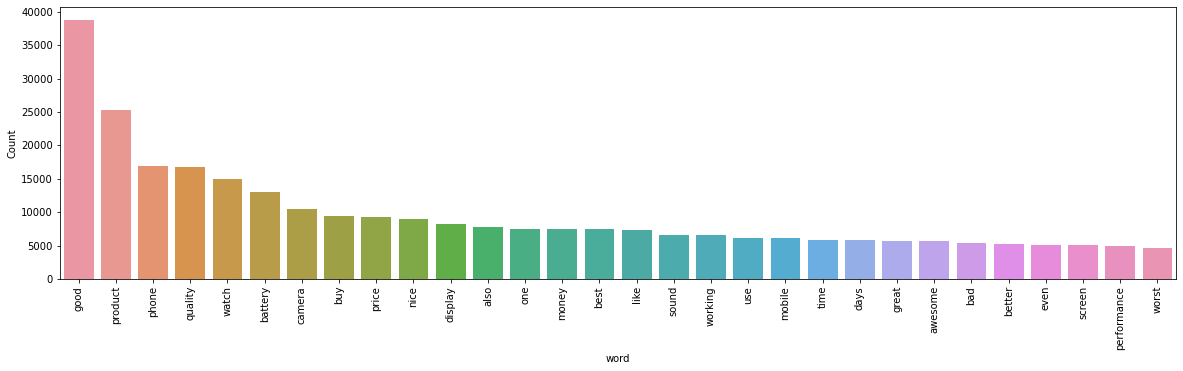

In [31]:
freq_words(df['Full_review'])

- we have printed the most accuring 20 words in our dataset.
- As we can see that the word 'good' is accuring most of the time.

## Printing Rarely Occurinng Word in Review:-

In [32]:
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nsmallest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.xticks(rotation=90)
 

    plt.show()

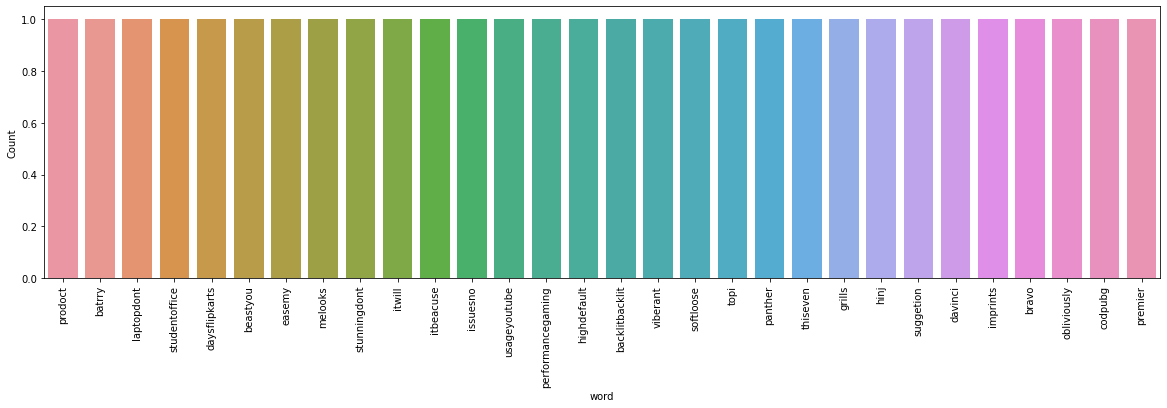

In [33]:
freq_words(df['Full_review'])

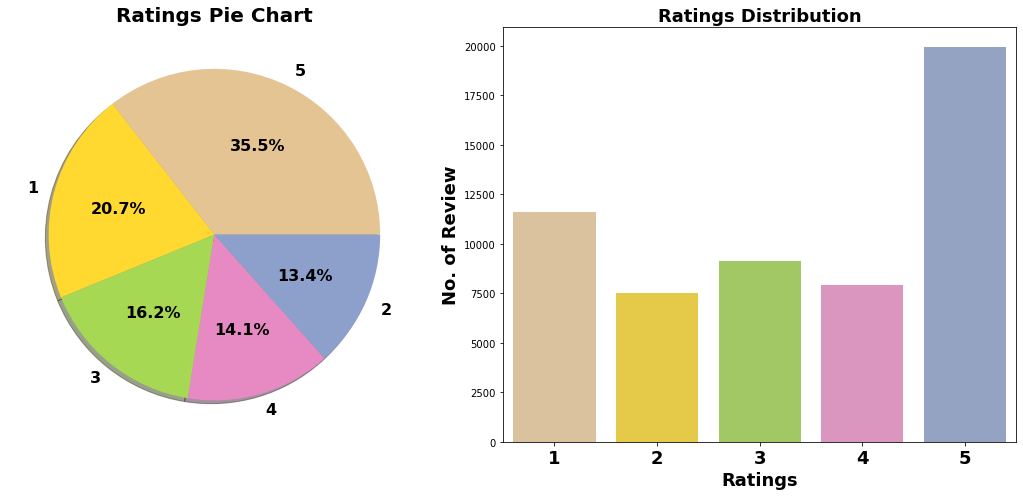

Value Counts of Rating:


5    19941
1    11596
3     9117
4     7931
2     7539
Name: Ratings, dtype: int64

In [34]:
# Pie & Count plot of Ratings
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
f,ax=plt.subplots(1,2,figsize=(15,7))
df['Ratings'].value_counts().plot.pie(autopct='%2.1f%%',
                                textprops ={'fontsize':16 ,'fontweight' :'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Ratings Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('Ratings',data=df,ax=ax[1])
ax[1].set_title('Ratings Distribution',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("Ratings",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No. of Review",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.tight_layout()
plt.show()
print('Value Counts of Rating:')
df['Ratings'].value_counts()

### Lemmatization


Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meanings to one word.

In [35]:
# Defining functiom to convert nltk tag to wordnet tags
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None
    
# Defining function to lemmatize our text
def lemmatize_sentence(sentence):
    # tokenize the sentence and find the pos_tag
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    # tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x : (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatize_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatize_sentence.append(word)
        else:
            lemmatize_sentence.append(lemination.lemmatize(word,tag))
    return " ".join(lemmatize_sentence)    

df['Full_review'] = df['Full_review'].apply(lambda x : lemmatize_sentence(x))

In [36]:
## printing review again:
for i in range(10):
    print(df.Full_review[i])
    print("\n**********Next Review*********\n") 

best market mannn incredible scared online payment first time dream laptop happy see awesome product quality i h rtx insaaanneee ill get tb ssd great build quality gameplay mindblowing give performance ryzen h ryzen h trust buy one compare cpu whr battery segment totaly nice go product

**********Next Review*********

brilliant laptop soo good buy lot research excellent build quality plastic super tuf buy video edit casual gaming boy performs well expectation pro cpu h good cpu almost fast last generation i rtx perform good gaming k video edit tb ssd worry storage rgb keyboard look good best part trackpad soo smooth work laptop h read

**********Next Review*********

brilliant amazing laptop great buy product diwali sale use sbi credit card buy product k totally worth best product gamers mechanical student widely use software like solidworks ansys etc

**********Next Review*********

terrific bring laptop fair bit research arguablythe best performance per money market impress build qua

## Normalization:

In [37]:
## scraping noise text:
def scrap(text):
    # remove HTML markup
    text = re.sub("(<.*?>)", "", text)
    # remove non-ascii and digits
    text = re.sub("(\\W)", " ", text)
    text = re.sub("(\\d)", "", text)
    # remove white space
    text = text.strip()
    return text

df['Full_review'] = df['Full_review'].apply(lambda x : scrap(x))

In [38]:
## printing review again:
for i in range(10):
    print(df.Full_review[i])
    print("\n**********Next Review*********\n") 

best market mannn incredible scared online payment first time dream laptop happy see awesome product quality i h rtx insaaanneee ill get tb ssd great build quality gameplay mindblowing give performance ryzen h ryzen h trust buy one compare cpu whr battery segment totaly nice go product

**********Next Review*********

brilliant laptop soo good buy lot research excellent build quality plastic super tuf buy video edit casual gaming boy performs well expectation pro cpu h good cpu almost fast last generation i rtx perform good gaming k video edit tb ssd worry storage rgb keyboard look good best part trackpad soo smooth work laptop h read

**********Next Review*********

brilliant amazing laptop great buy product diwali sale use sbi credit card buy product k totally worth best product gamers mechanical student widely use software like solidworks ansys etc

**********Next Review*********

terrific bring laptop fair bit research arguablythe best performance per money market impress build qua

## Counting the Words in 'Full_review':

In [39]:
# Creating column for word counts in the review text
df['new_review'] = df['Full_review'].apply(lambda x: len(str(x).split(' ')))
df.head(10)

,Ratings,Review_Text,Summary,Full_review,new_review
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!,best market mannn incredible scared online pay...,47
1,5,This laptop is soo good and I bought it after ...,Brilliant,brilliant laptop soo good buy lot research exc...,56
2,5,Amazing laptop just great i bought this produc...,Brilliant,brilliant amazing laptop great buy product diw...,29
3,5,Brought this laptop after fair bit of research...,Terrific,terrific bring laptop fair bit research arguab...,22
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase,mindblowing purchase much well single core per...,24
5,5,Great laptop with all the features exclusive!\...,Just wow!,wow great laptop feature exclusive compare asu...,22
6,5,The best performance.\n\nI searched a lot befo...,Excellent,excellent best performance search lot buy lapt...,52
7,5,Value for money in this price segment...laptop...,Just wow!,wow value money price segmentlaptop similar sp...,46
8,5,I am reviewing this laptop after 16 days of us...,Terrific,terrific review laptop day use performance tre...,50
9,5,Awesome laptop\nGood perfomance\nBattery life ...,Brilliant,brilliant awesome laptop good perfomance batte...,22


## Visualization:-

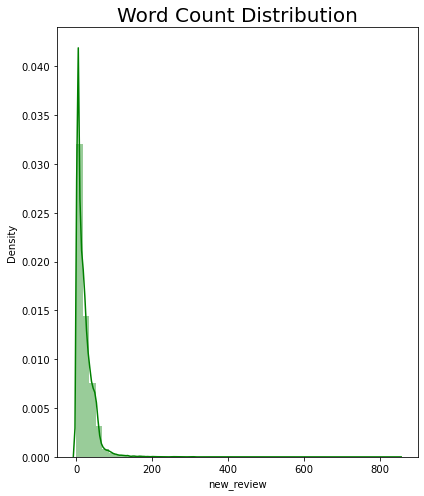

In [40]:
### Let's visulaize our word count first:
plt.figure(figsize=(6,7))
sns.distplot(df['new_review'], kde=True,color='green')
plt.title('Word Count Distribution',fontsize=20)
plt.tight_layout()

- As we can see that most of the words are accuring 0 to 10 times range.
- Word counts is highly right skewed.

## Character count in Review:

In [41]:
df['Review_character_count'] = df['Full_review'].str.len()
df.head(10)

,Ratings,Review_Text,Summary,Full_review,new_review,Review_character_count
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!,best market mannn incredible scared online pay...,47,286
1,5,This laptop is soo good and I bought it after ...,Brilliant,brilliant laptop soo good buy lot research exc...,56,322
2,5,Amazing laptop just great i bought this produc...,Brilliant,brilliant amazing laptop great buy product diw...,29,187
3,5,Brought this laptop after fair bit of research...,Terrific,terrific bring laptop fair bit research arguab...,22,164
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase,mindblowing purchase much well single core per...,24,154
5,5,Great laptop with all the features exclusive!\...,Just wow!,wow great laptop feature exclusive compare asu...,22,131
6,5,The best performance.\n\nI searched a lot befo...,Excellent,excellent best performance search lot buy lapt...,52,320
7,5,Value for money in this price segment...laptop...,Just wow!,wow value money price segmentlaptop similar sp...,46,309
8,5,I am reviewing this laptop after 16 days of us...,Terrific,terrific review laptop day use performance tre...,50,303
9,5,Awesome laptop\nGood perfomance\nBattery life ...,Brilliant,brilliant awesome laptop good perfomance batte...,22,148


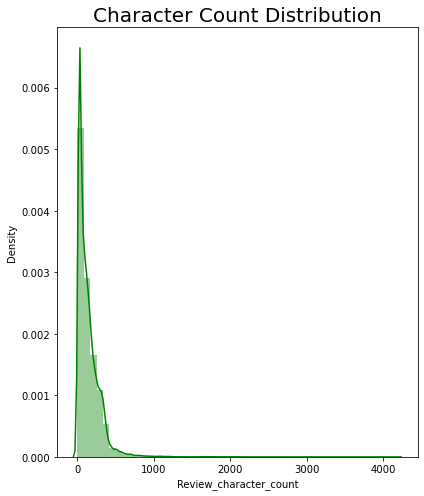

In [42]:
### Let's visulaize our character count first:
plt.figure(figsize=(6,7))
sns.distplot(df['Review_character_count'], kde=True,color='green')
plt.title('Character Count Distribution',fontsize=20)
plt.tight_layout()

**Above plot represents histogram for character count of review text, which is quite similar to the histogram of word count.**

## Handling Outliers Using Zscore:-

In [43]:
from scipy import stats
from scipy.stats import zscore

In [44]:
z_score=zscore(df[['new_review']])
abs_zscore=np.abs(z_score)

In [45]:
threshold=3
new_entry=(abs_zscore<threshold).all(axis=1)
df_new=df[new_entry]
print("The shape before: ", df.shape)
print("The shape after: ",df_new.shape)

The shape before:  (56124, 6)
The shape after:  (55348, 6)


## Checking Our Target variable is Balanced or not??

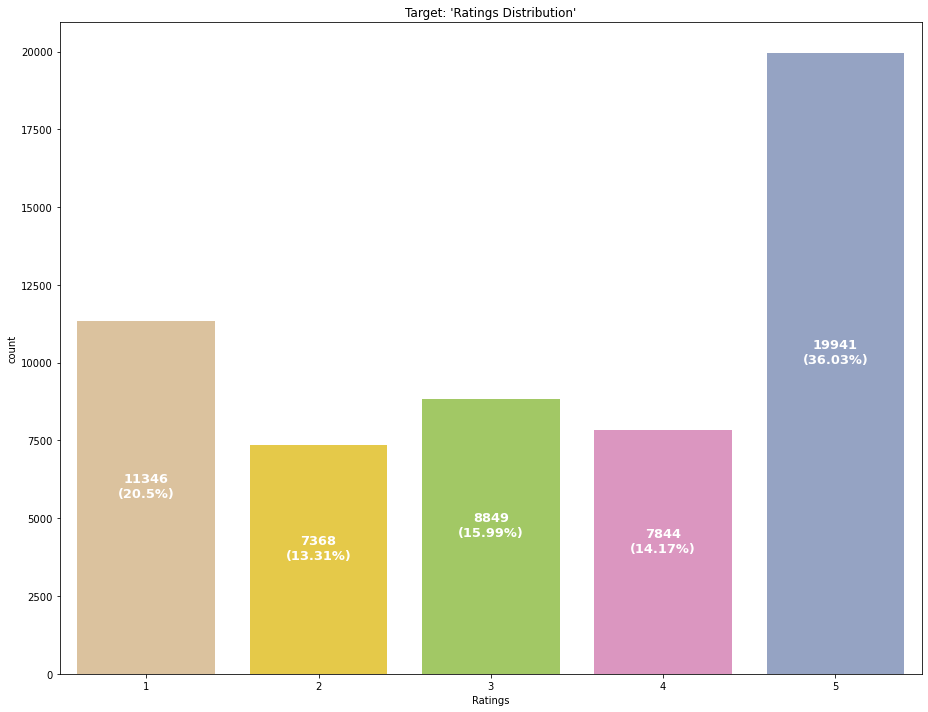

In [46]:
fig, ax = plt.subplots(1,1,figsize=(13,10))
sns.countplot(x='Ratings',data=df_new,ax=ax)
count=0
for i in ax.patches:
    x = i.get_height()/2
    height = i.get_height()
    ratio = round(height*100/len(df_new),2)
    prn = f"{height}\n({ratio}%)"
    ax.text(count,x,prn,ha="center",color="white",rotation=0,fontweight="bold",fontsize="13")
    count += 1
    
plt.title("Target: 'Ratings Distribution'")
plt.show()

- As we can see that 5 Star rating received by most of the customers.
- However we see a high 1 star rating as well compared to 2 and 3 star rating reviews.
- But the count of 2 star and 3 star ratings received from customers is very low. so we have to handle it accordingly.

5    19941
1    11346
3     8849
4     7844
2     7368
Name: Ratings, dtype: int64


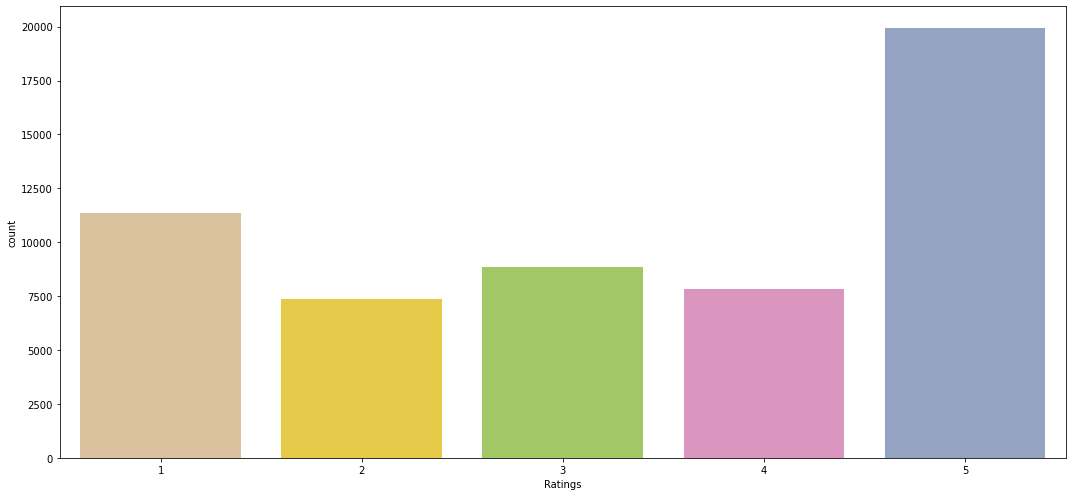

In [47]:
# Checking the count of target column values
plt.figure(figsize=(15,7))
sns.countplot(df_new['Ratings'])
print(df_new.Ratings.value_counts())
plt.show()

- If we failed to handle this problem then the model will become a disaster because modeling using class-imbalanced data is biased in favor of the majority class.
- Looking at the above count plot for our target varible (Ratings) we can say that the data set is having most number of reviews rated as 5 star and very less number of reviews rated as 2 star and 3 star.
- Which will cause the Imbalance problem for our Machine Learning model and make it bias.So I am selecting equal number of reviews of each rating as a input for our model to avoid any kind of biasness
- For that first I will shuffle the dataset so that we can select data from both web-sites (Amazon and Flipkart).Then I will select equal number of data of every category and ensure that the rating values are balanced.


## Checking review word count distribution for each rating:-

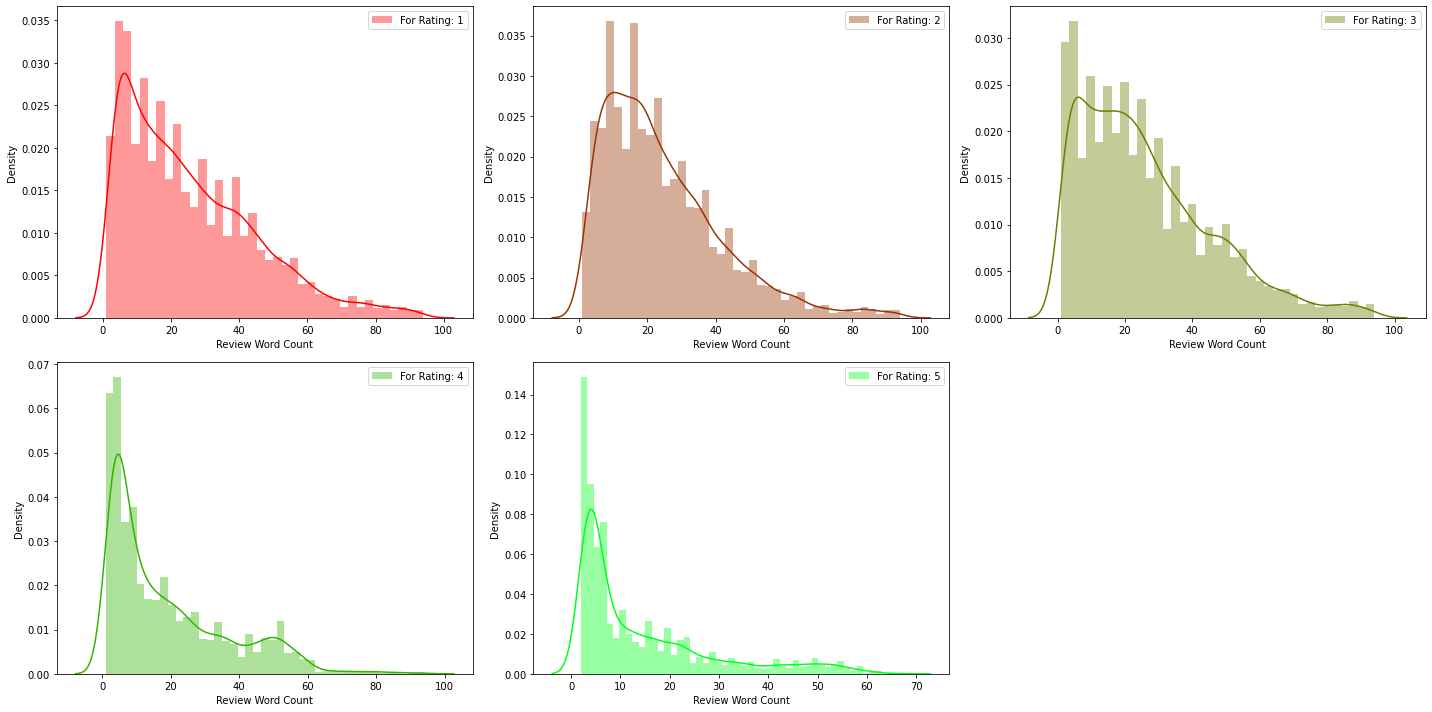

In [48]:
ratings = np.sort(df_new.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
count = 1
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
for i in ratings:
    axis = fig.add_subplot(rows,cols,count)
    sns.distplot(df_new.new_review[df_new.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Word Count")
    axis.legend()
    count += 1
    
plt.show()

- We noticed that every type of ratings word count distribution is highly right skewed.
- Also we see that most of the word count falling in the range of 0 to 10.

## Similarly Checking review character count distribution for each rating:-

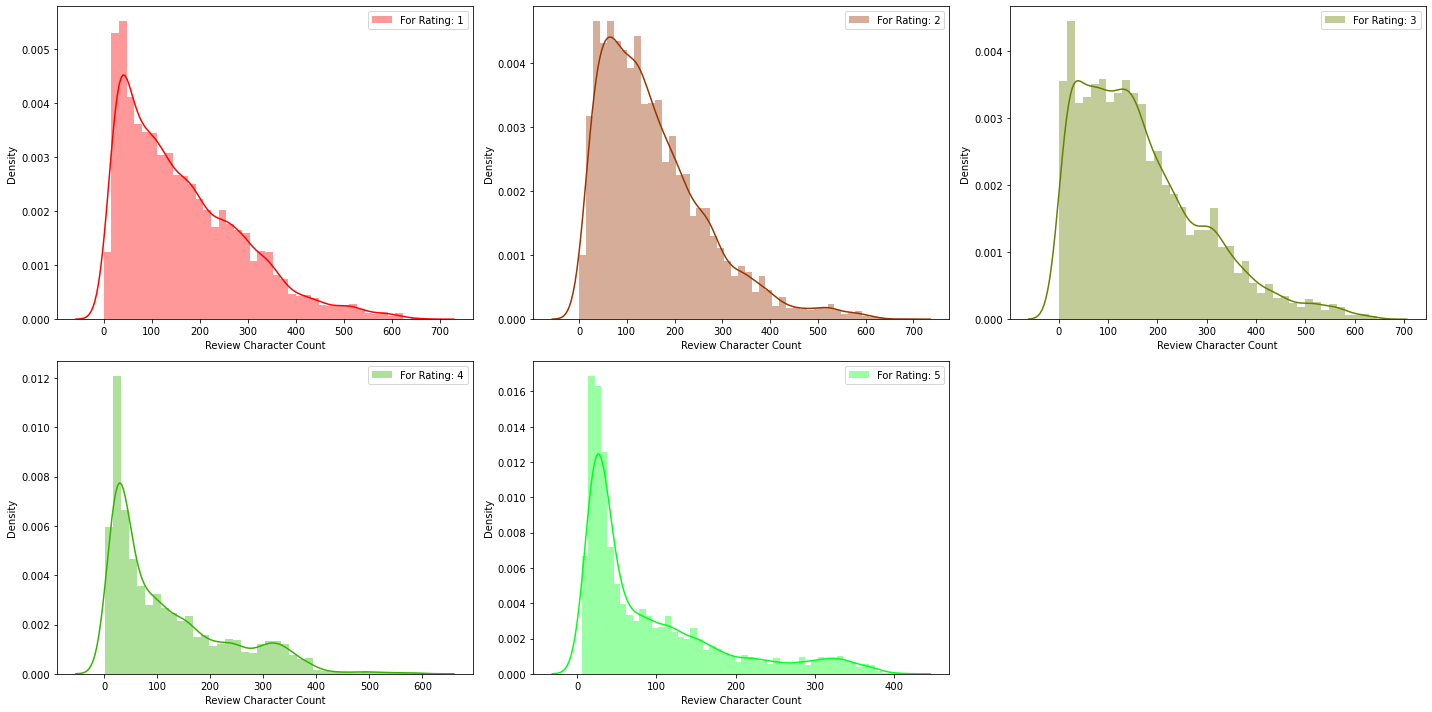

In [49]:
ratings = np.sort(df_new.Ratings.unique())
cols = 3
rows = len(ratings)//cols
if rows % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
colors = [(1,0,0,1),(0.6,0.2,0,1),(0.4,0.5,0,1),(0.2,0.7,0,1),(0,1,0.1,1)]
count=1
for i in ratings:
    axis = fig.add_subplot(rows,cols,count)
    sns.distplot(df_new.Review_character_count[df_new.Ratings==i], ax=axis, label=f"For Rating: {i}", color=colors[i-1])
    axis.set_xlabel(f"Review Character Count")
    axis.legend()
    count += 1
    
plt.show()

- We noticed that for every type rating, the character count distribution is highly right skewed.
- Similarly most of character's count is falling in the range of 0 to 10.

## Checking Word cloud by Rating:

In [50]:
from wordcloud import WordCloud

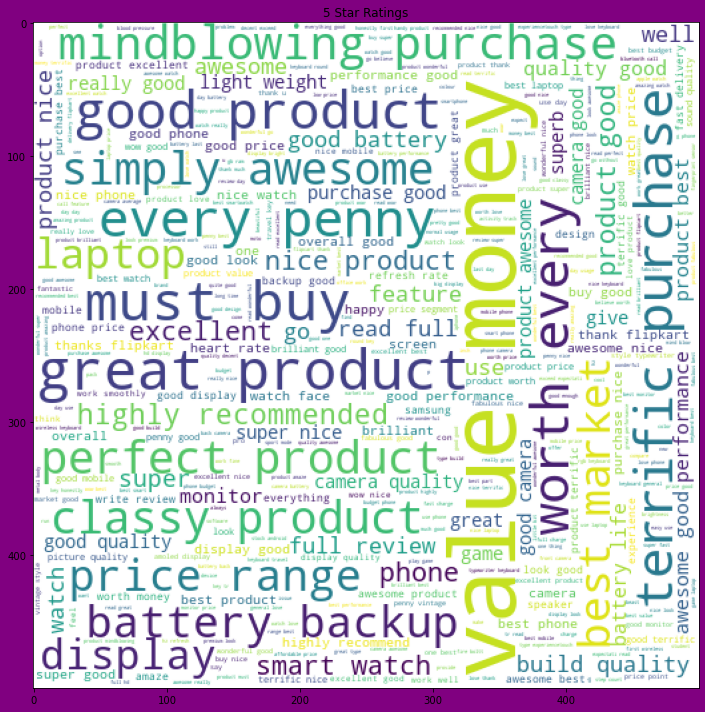

In [51]:
### 5 Star rating
star =df_new['Full_review'][df_new['Ratings']==5]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('5 Star Ratings')
plt.show()

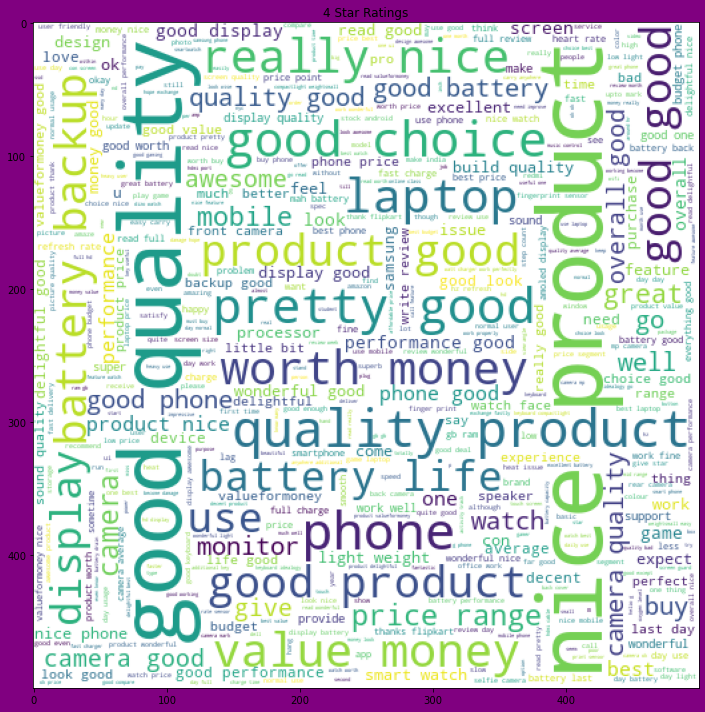

In [52]:
### 4 Star rating
star =df_new['Full_review'][df_new['Ratings']==4]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('4 Star Ratings')
plt.show()

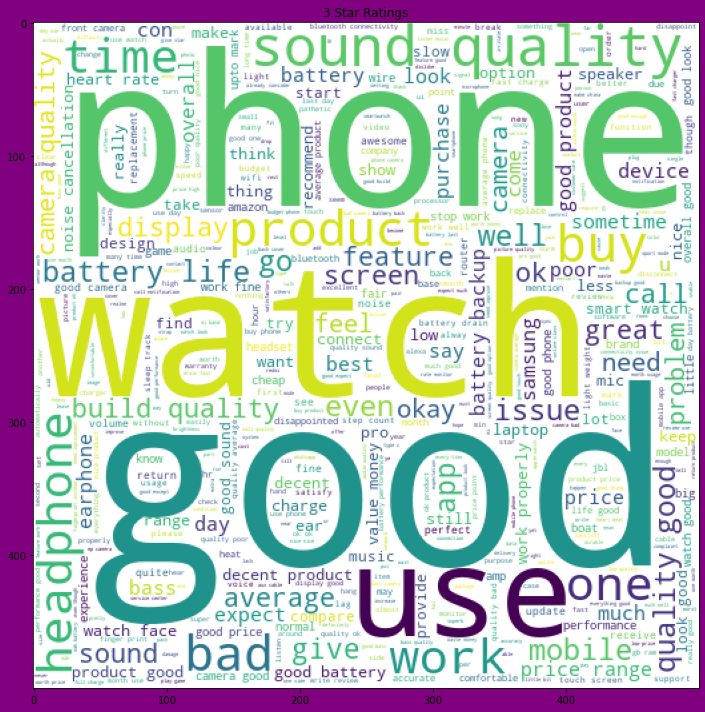

In [53]:
### 3 Star rating
star =df_new['Full_review'][df_new['Ratings']==3]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('3 Star Ratings')
plt.show()

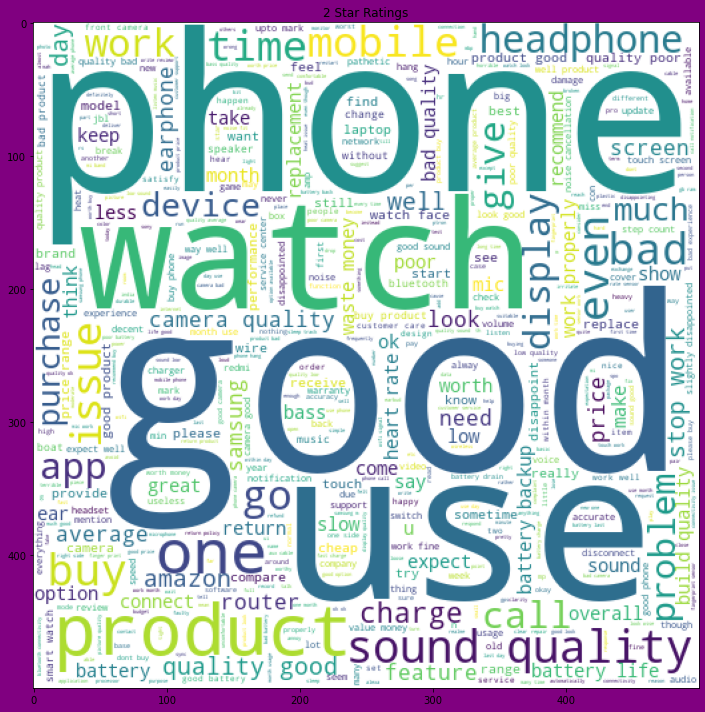

In [54]:
### 2 Star rating
star =df_new['Full_review'][df_new['Ratings']==2]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('2 Star Ratings')
plt.show()

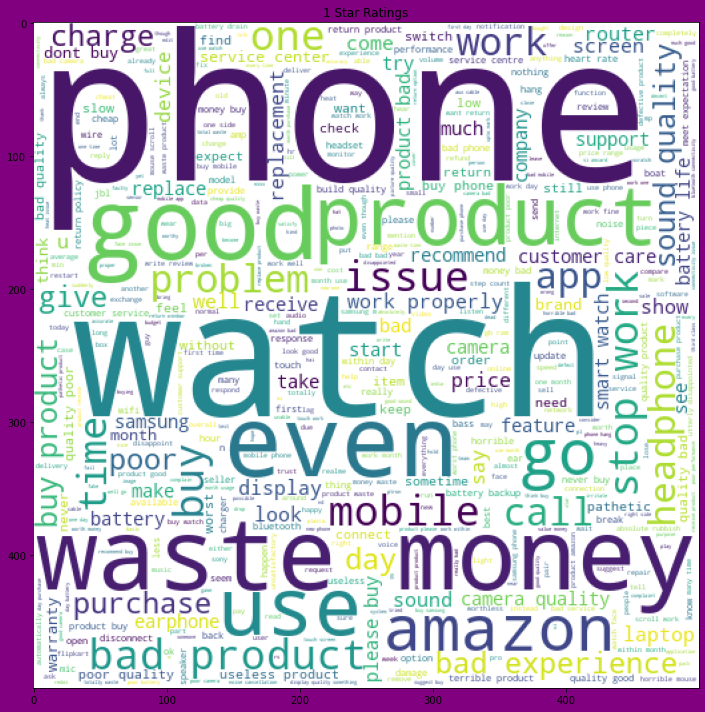

In [55]:
### 1 Star rating
star =df_new['Full_review'][df_new['Ratings']==1]
cloud= WordCloud(background_color='white',max_words=500,width=500,height=500).generate(' '.join(star))
plt.figure(figsize=(10,10),facecolor = 'purple')
plt.imshow(cloud)
plt.title('1 Star Ratings')
plt.show()

Observation of Word Cloud Visualization:-
'For Rating: 1' It mostly consists of words like watch, use, bad product, waste, time, money, bad experience, issue etc

'For Rating: 2' It mostly consists of words like good, phone, use, watch, poor, issue, waste money, quality good, bad, problem etc

'For Rating: 3' It mostly consists of words like sound quality, good, use, time, camera quality, display, buy, build quality etc

'For Rating: 4' It mostly consists of words like use, buy, phone, watch, good product, good quality, good choice, nice product etc

'For Rating: 5' It mostly consists of words like price range, value money, good product, well, go, simply awesome, perfect product etc

## Model Building Phase:

In [56]:
### spliting the dataset:-
x=df_new['Full_review']
y=df_new['Ratings']

## Handling Imbalanced dataset:

In [57]:
### Value Counts
df_new['Ratings'].value_counts()

5    19941
1    11346
3     8849
4     7844
2     7368
Name: Ratings, dtype: int64

If we take 8000 records for every star then our model will not look as imbalanced dataset.

In [58]:
# Select data from every Ratings category
df1 = df[df['Ratings']==1][0:8000]
df2 = df[df['Ratings']==2][0:8000]
df3 = df[df['Ratings']==3][0:8000]
df4 = df[df['Ratings']==4][0:8000]
df5 = df[df['Ratings']==5][0:8000]

In [59]:
### Adding all the dataframes:
df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)

In [60]:
df.Ratings.value_counts()

1    8000
3    8000
5    8000
4    7931
2    7539
Name: Ratings, dtype: int64

In [61]:
df.isna().sum()

Ratings                   0
Review_Text               0
Summary                   0
Full_review               0
new_review                0
Review_character_count    0
dtype: int64

In [62]:
!pip install lightgbm

In [63]:
### Importing necessary libraries:-
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score, classification_report

from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

In [64]:
df_new

,Ratings,Review_Text,Summary,Full_review,new_review,Review_character_count
0,5,Mannn this is just incredible 😍 i was scared o...,Best in the market!,best market mannn incredible scared online pay...,47,286
1,5,This laptop is soo good and I bought it after ...,Brilliant,brilliant laptop soo good buy lot research exc...,56,322
2,5,Amazing laptop just great i bought this produc...,Brilliant,brilliant amazing laptop great buy product diw...,29,187
3,5,Brought this laptop after fair bit of research...,Terrific,terrific bring laptop fair bit research arguab...,22,164
4,5,11400 Has Much Better Single Core Performance ...,Mind-blowing purchase,mindblowing purchase much well single core per...,24,154
...,...,...,...,...,...,...
56237,4,Good,\r\n Very nice\r\n,nice good,2,9
56238,4,Picture Clarity is Good,\r\n Screen quality<br>Picture Clarity is ver...,screen quality picture clarity good nd photo c...,16,106
56239,4,Overall good phone,"\r\n Good phone, battery drain fast.\r\n",good phone battery drain fast overall good phone,8,48
56240,4,Good product,\r\n Very very like\r\n,like good product,3,17


In [65]:
### first converting the reveiw feature
vector = TfidfVectorizer(max_features=100000,smooth_idf=False, stop_words='english')

In [66]:
x = vector.fit_transform(df_new['Full_review'])
x

<55348x22792 sparse matrix of type '<class 'numpy.float64'>'
	with 834484 stored elements in Compressed Sparse Row format>

In [67]:
y.head()

0    5
1    5
2    5
3    5
4    5
Name: Ratings, dtype: int32

In [68]:
### printing the training the testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state =27)

print('Training feature matrix size:',x_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',x_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (38743, 22792)
Training target vector size: (38743,)
Test feature matrix size: (16605, 22792)
Test target vector size: (16605,)


## Defining a Function for best random State:

In [69]:
### importing curve metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score

In [70]:
### Best Random STATE:
def Random_state(Model,Feature,Target):
    maximum_accu=0
    for i in range(11,36):
        x_train,x_test,y_train,y_test=train_test_split(Feature,Target,test_size=0.25,random_state=i)
        Model.fit(Feature,Target)
        train_pred=Model.predict(x_train)
        test_pred=Model.predict(x_test)
        accu_score=accuracy_score(y_test,test_pred)
        print("For Random State {}, the Accuracy Score is: {}".format(i,accu_score))
        if accu_score>maximum_accu:
            
            maximum_accu=accu_score
            j=i
    print("\n")        
    print(" The Highest Accuracy SCORE is: {}".format(maximum_accu))
    print("\n The Best Random State is:")
    return j

## Defining a Function for Printing Accuracy:

In [71]:
def print_score(clf,x,y,randomstate,train=True):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=randomstate)
    clf.fit(x_train,y_train)
    if train:
        y_pred= clf.predict(x_train)
        print("\n**********************************Training Score****************************************")
        
        print(f"Accuracy Score : {accuracy_score(y_train,y_pred)*100:.2f}%")
        print("\n *********************************Confusion Matrix**************************************")
        print(confusion_matrix(y_train,y_pred))
        
        print("\n \n Training Classification Report \n" ,classification_report(y_train,y_pred,digits=2))
        
    elif train==False:
        pred=clf.predict(x_test)
        print('\n \n')
        print("\n*********************************Test Result**********************************************")
        print(f"Accuracy_Score : {accuracy_score(y_test,pred)*100:.2f}%")
        print("\n*********************************Confusion Matrix*****************************************")
        print(confusion_matrix(y_test,pred))
        
        print("\n \n Test Classification Report \n", classification_report(y_test,pred,digits=2))

## Defining A funtion for cross Validation:

In [72]:
def cross_val(Model,independent,dependent,randomstate):
    x_train,x_test,y_train,y_test=train_test_split(independent,dependent,test_size=0.2,random_state=randomstate)
    Model.fit(x_train,y_train)
    pred=Model.predict(x_test)
    for i in range(3,4):
        cv_score=cross_val_score(Model,x,y,cv=i)
        cv_mean=cv_score.mean()
        print('At cv :- ', i)
        print('Cross Validation score is :- ', cv_mean)
        print('Accuracy score is :- ',accuracy_score(y_test,pred))
        print('\n')

## 1. Logistic Regression

In [73]:
## random State
Random_state(LogisticRegression(),x,y)

For Random State 11, the Accuracy Score is: 0.8508347185083471
For Random State 12, the Accuracy Score is: 0.8497506684975067
For Random State 13, the Accuracy Score is: 0.8501120185011202
For Random State 14, the Accuracy Score is: 0.8500397485003974
For Random State 15, the Accuracy Score is: 0.8515574185155742
For Random State 16, the Accuracy Score is: 0.8499674784996748
For Random State 17, the Accuracy Score is: 0.8475825684758257
For Random State 18, the Accuracy Score is: 0.84823299848233
For Random State 19, the Accuracy Score is: 0.8470766784707667
For Random State 20, the Accuracy Score is: 0.8487388884873889
For Random State 21, the Accuracy Score is: 0.8506179085061791
For Random State 22, the Accuracy Score is: 0.8510515285105152
For Random State 23, the Accuracy Score is: 0.8464262484642625
For Random State 24, the Accuracy Score is: 0.8481607284816073
For Random State 25, the Accuracy Score is: 0.8520633085206331
For Random State 26, the Accuracy Score is: 0.85090698850

27

In [74]:
print_score(LogisticRegression(),x,y,27,train=True)
print_score(LogisticRegression(),x,y,27,train=False)


**********************************Training Score****************************************
Accuracy Score : 84.73%

 *********************************Confusion Matrix**************************************
[[ 7931   570   418    65    41]
 [ 1327  3558   829   126    58]
 [  662   692  5178   339   168]
 [   76    62   416  5128   619]
 [    8     9    48   227 15723]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.79      0.88      0.83      9025
           2       0.73      0.60      0.66      5898
           3       0.75      0.74      0.74      7039
           4       0.87      0.81      0.84      6301
           5       0.95      0.98      0.96     16015

    accuracy                           0.85     44278
   macro avg       0.82      0.80      0.81     44278
weighted avg       0.84      0.85      0.84     44278


 


*********************************Test Result**********************************************
Accuracy

In [75]:
cross_val(LogisticRegression(),x,y,27)

At cv :-  3
Cross Validation score is :-  0.6547476700705179
Accuracy score is :-  0.7915085817524842




## 2. Decision Tree Classifier

In [76]:
## random State
Random_state(DecisionTreeClassifier(),x,y)

For Random State 11, the Accuracy Score is: 0.9929175399291754
For Random State 12, the Accuracy Score is: 0.9933511599335116
For Random State 13, the Accuracy Score is: 0.9932066199320662
For Random State 14, the Accuracy Score is: 0.994941099949411
For Random State 15, the Accuracy Score is: 0.9939293199392932
For Random State 16, the Accuracy Score is: 0.99277299992773
For Random State 17, the Accuracy Score is: 0.9919780299197803
For Random State 18, the Accuracy Score is: 0.9937125099371251
For Random State 19, the Accuracy Score is: 0.993495699934957
For Random State 20, the Accuracy Score is: 0.9930620799306208
For Random State 21, the Accuracy Score is: 0.9937125099371251
For Random State 22, the Accuracy Score is: 0.9932788899327889
For Random State 23, the Accuracy Score is: 0.9925561899255619
For Random State 24, the Accuracy Score is: 0.9936402399364024
For Random State 25, the Accuracy Score is: 0.992050299920503
For Random State 26, the Accuracy Score is: 0.99400158994001

14

In [77]:
### printing the scores:
print_score(DecisionTreeClassifier(),x,y,14,train=True)
print_score(DecisionTreeClassifier(),x,y,14,train=False)


**********************************Training Score****************************************
Accuracy Score : 99.30%

 *********************************Confusion Matrix**************************************
[[ 8975    19     3     8     0]
 [   10  5866     8    19     0]
 [    7    24  6997    60     7]
 [    1     3    22  6200   104]
 [    0     0     2    13 15930]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9005
           2       0.99      0.99      0.99      5903
           3       1.00      0.99      0.99      7095
           4       0.98      0.98      0.98      6330
           5       0.99      1.00      1.00     15945

    accuracy                           0.99     44278
   macro avg       0.99      0.99      0.99     44278
weighted avg       0.99      0.99      0.99     44278


 


*********************************Test Result**********************************************
Accuracy

## Cross Validation

In [78]:
cross_val(DecisionTreeClassifier(),x,y,14)

At cv :-  3
Cross Validation score is :-  0.6175652609652734
Accuracy score is :-  0.8293586269196025





## 3. RandomForest Classifier

In [79]:
### printing the scores:
print_score(RandomForestClassifier(),x,y,14,train=True)
print_score(RandomForestClassifier(),x,y,14,train=False)


**********************************Training Score****************************************
Accuracy Score : 99.30%

 *********************************Confusion Matrix**************************************
[[ 8971    21     5     8     0]
 [    8  5866    10    19     0]
 [    5    22  6991    68     9]
 [    1     3    14  6208   104]
 [    0     0     0    13 15932]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9005
           2       0.99      0.99      0.99      5903
           3       1.00      0.99      0.99      7095
           4       0.98      0.98      0.98      6330
           5       0.99      1.00      1.00     15945

    accuracy                           0.99     44278
   macro avg       0.99      0.99      0.99     44278
weighted avg       0.99      0.99      0.99     44278


 


*********************************Test Result**********************************************
Accuracy

In [80]:
cross_val(RandomForestClassifier(),x,y,14)

At cv :-  3
Cross Validation score is :-  0.6762300240958217
Accuracy score is :-  0.8576332429990967




## 4. AdaBoost Classifier

In [81]:
### printing the scores:
print_score(AdaBoostClassifier(),x,y,14,train=True)
print_score(AdaBoostClassifier(),x,y,14,train=False)



**********************************Training Score****************************************
Accuracy Score : 66.07%

 *********************************Confusion Matrix**************************************
[[ 7745   254   682   191   133]
 [ 3851   346  1236   300   170]
 [ 2923   369  2458   994   351]
 [  326    33   770  4437   764]
 [  169    23   228  1256 14269]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.52      0.86      0.64      9005
           2       0.34      0.06      0.10      5903
           3       0.46      0.35      0.39      7095
           4       0.62      0.70      0.66      6330
           5       0.91      0.89      0.90     15945

    accuracy                           0.66     44278
   macro avg       0.57      0.57      0.54     44278
weighted avg       0.64      0.66      0.63     44278


 


*********************************Test Result**********************************************
Accuracy

## Cross Validation

In [82]:
cross_val(AdaBoostClassifier(),x,y,14)

At cv :-  3
Cross Validation score is :-  0.6179265802848283
Accuracy score is :-  0.6621499548328816




## 5. Gradient Boosting Classifier

In [83]:
### printing the scores:
print_score(GradientBoostingClassifier(),x,y,14,train=True)
print_score(GradientBoostingClassifier(),x,y,14,train=False)


**********************************Training Score****************************************
Accuracy Score : 77.00%

 *********************************Confusion Matrix**************************************
[[ 7320   937   553    91   104]
 [ 1885  2511  1176   161   170]
 [ 1014  1021  4228   432   400]
 [  110   106   593  4713   808]
 [  101    38   118   364 15324]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.70      0.81      0.75      9005
           2       0.54      0.43      0.48      5903
           3       0.63      0.60      0.61      7095
           4       0.82      0.74      0.78      6330
           5       0.91      0.96      0.94     15945

    accuracy                           0.77     44278
   macro avg       0.72      0.71      0.71     44278
weighted avg       0.76      0.77      0.76     44278


 


*********************************Test Result**********************************************
Accuracy

## Cross Validation:-

In [84]:
cross_val(GradientBoostingClassifier(),x,y,14)

At cv :-  3
Cross Validation score is :-  0.6570423565185659
Accuracy score is :-  0.7560975609756098




## 6. ExtraTree Classifier

In [85]:
### printing the scores:
print_score(ExtraTreesClassifier(),x,y,14,train=True)
print_score(ExtraTreesClassifier(),x,y,14,train=False)


**********************************Training Score****************************************
Accuracy Score : 99.30%

 *********************************Confusion Matrix**************************************
[[ 8975    19     3     8     0]
 [   10  5866     8    19     0]
 [    7    24  6997    60     7]
 [    1     3    22  6200   104]
 [    0     0     2    13 15930]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      9005
           2       0.99      0.99      0.99      5903
           3       1.00      0.99      0.99      7095
           4       0.98      0.98      0.98      6330
           5       0.99      1.00      1.00     15945

    accuracy                           0.99     44278
   macro avg       0.99      0.99      0.99     44278
weighted avg       0.99      0.99      0.99     44278


 


*********************************Test Result**********************************************
Accuracy

## Cross Validation:-

In [86]:
cross_val(ExtraTreesClassifier(),x,y,14)

At cv :-  3
Cross Validation score is :-  0.6682080461760767
Accuracy score is :-  0.8579945799457994




## 7. GaussianNB Classifier

In [87]:
### printing the scores:
print_score(MultinomialNB(),x,y,14,train=True)
print_score(MultinomialNB(),x,y,14,train=False)


**********************************Training Score****************************************
Accuracy Score : 72.71%

 *********************************Confusion Matrix**************************************
[[ 8220    41   430     6   308]
 [ 2582  1401  1228    24   668]
 [ 1248    58  4436    30  1323]
 [  184     9   350  2254  3533]
 [   16     1    39     5 15884]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.67      0.91      0.77      9005
           2       0.93      0.24      0.38      5903
           3       0.68      0.63      0.65      7095
           4       0.97      0.36      0.52      6330
           5       0.73      1.00      0.84     15945

    accuracy                           0.73     44278
   macro avg       0.80      0.63      0.63     44278
weighted avg       0.77      0.73      0.69     44278


 


*********************************Test Result**********************************************
Accuracy

## Cross Validation:-

In [88]:
cross_val(MultinomialNB(),x,y,14)

At cv :-  3
Cross Validation score is :-  0.606977468538846
Accuracy score is :-  0.6914182475158085




## 8. LGBMClassifier:

In [89]:
### printing the scores:
print_score(LGBMClassifier(),x,y,14,train=True)
print_score(LGBMClassifier(),x,y,14,train=False)


**********************************Training Score****************************************
Accuracy Score : 87.85%

 *********************************Confusion Matrix**************************************
[[ 8010   527   384    57    27]
 [ 1197  3861   716    87    42]
 [  596   575  5592   239    93]
 [   47    46   252  5599   386]
 [   15     8    19    67 15836]]

 
 Training Classification Report 
               precision    recall  f1-score   support

           1       0.81      0.89      0.85      9005
           2       0.77      0.65      0.71      5903
           3       0.80      0.79      0.80      7095
           4       0.93      0.88      0.90      6330
           5       0.97      0.99      0.98     15945

    accuracy                           0.88     44278
   macro avg       0.86      0.84      0.85     44278
weighted avg       0.88      0.88      0.88     44278


 


*********************************Test Result**********************************************
Accuracy

## Cross Validation:-

In [90]:
cross_val(LGBMClassifier(),x,y,14)

At cv :-  3
Cross Validation score is :-  0.6752362750252252
Accuracy score is :-  0.8193315266485999




## Conclusion:

As we noticed that every model's training score showing greate as well as testing score. But after checking the Cross validation we face the reality of our models. Every model is extremely over fitted.
After Checking the Cross Validation we observe that RandomForestClassifier models showing highest accuracy among all of them.
Now, we will do Some tunning for this model. Let's Check if we increase their accuracy or not.

## HyperParameter Tunning:

In [97]:
 ##Lets select the different parameters for tuning our best model (ExtraTreeClassifier)
grid_params = {'n_estimators':[300,450],
               'criterion':['gini','entropy'],
               'max_depth': [800,900],
               'max_features':['auto','sqrt']}

# Train the model with given parameters using GridSearchCV
GSCV =  GridSearchCV(ExtraTreesClassifier(), grid_params, cv=3, verbose=3)
GSCV.fit(x_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END criterion=gini, max_depth=800, max_features=auto, n_estimators=300;, score=0.815 total time=10.4min
[CV 2/3] END criterion=gini, max_depth=800, max_features=auto, n_estimators=300;, score=0.818 total time= 8.4min
[CV 3/3] END criterion=gini, max_depth=800, max_features=auto, n_estimators=300;, score=0.817 total time= 7.3min
[CV 1/3] END criterion=gini, max_depth=800, max_features=auto, n_estimators=450;, score=0.816 total time=10.9min
[CV 2/3] END criterion=gini, max_depth=800, max_features=auto, n_estimators=450;, score=0.820 total time=11.0min
[CV 3/3] END criterion=gini, max_depth=800, max_features=auto, n_estimators=450;, score=0.818 total time=11.0min
[CV 1/3] END criterion=gini, max_depth=800, max_features=sqrt, n_estimators=300;, score=0.817 total time= 7.4min
[CV 2/3] END criterion=gini, max_depth=800, max_features=sqrt, n_estimators=300;, score=0.820 total time= 7.7min
[CV 3/3] END criterion=gini, max_de

GridSearchCV(cv=3, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [800, 900],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [300, 450]},
             verbose=3)

In [98]:
print(GSCV.best_params_)

{'criterion': 'gini', 'max_depth': 800, 'max_features': 'sqrt', 'n_estimators': 450}


In [103]:
### Model Evaluation

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=14)

rf=ExtraTreesClassifier(n_estimators=450,criterion="gini",max_depth=800,max_features="sqrt")

rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print("\n\n")
print("***********************Testing Scores******************************\n")
print("Accuracy score for testing is : ", accuracy_score(y_test,y_pred))
# Printing the classification report
print(f"\nCLASSIFICATION REPORT: \n {classification_report(y_test, y_pred)}")
# Printing the Confusion matrix
print(f"\nCONFUSION MATRIX: \n {confusion_matrix(y_test, y_pred)}")




***********************Testing Scores******************************

Accuracy score for testing is :  0.8523523885235239

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           1       0.75      0.90      0.82      2922
           2       0.76      0.55      0.64      1841
           3       0.78      0.73      0.75      2188
           4       0.95      0.84      0.89      1908
           5       0.94      1.00      0.97      4978

    accuracy                           0.85     13837
   macro avg       0.84      0.80      0.81     13837
weighted avg       0.85      0.85      0.85     13837


CONFUSION MATRIX: 
 [[2637  135  115    6   29]
 [ 532 1005  243   14   47]
 [ 293  164 1596   51   84]
 [  33   13   92 1594  176]
 [   2    1    7    6 4962]]


In [104]:
import scikitplot as sktplt

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

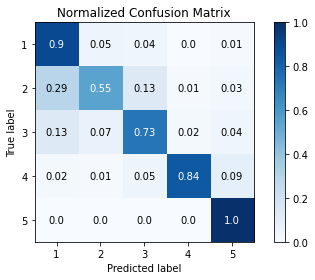

In [105]:
## Visualize the confusion matrix:
sktplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

### Saving Final Model

In [113]:
import joblib
joblib.dump(rf,"Rating_prediction.pkl")

['Rating_prediction.pkl']

## Actual Vs Predicted:

In [114]:
original=np.array(y_test)
predicted=np.array(rf.predict(x_test))
compare=pd.DataFrame({'Actual':original,'Predicted':predicted},index=range(len(original)))
compare


,Actual,Predicted
0,5,5
1,5,5
2,1,2
3,3,3
4,3,1
...,...,...
13832,5,5
13833,3,1
13834,1,1
13835,5,5
